# 1.0 Data Exploration
## Disclaimer: 
If you are not familiar with `Pandas` have a look at the [Pandas in 10 min Tutorial](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) before you continue. For those who already know `Pandas` but are still interested in freshing up their skills look at the [Pandas Cookbook](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html).

## Imports

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

## Load the data set
First let's load the diffent files of our datase. 

### Stores
The describing statistics show us, that we have 144 unique stores, across 37 cities, and 4 different store types. 

In [2]:
# Load from csv
df_stores = pd.read_csv('../dataset/turkish_retail_data/store_cities.csv', 
                        delimiter=',', 
                        dtype={'store_id':'category',
                               'storetype_id':'category',
                               'city_id':'category'})

# Display data and stats
display('Data', df_stores.head())
display('Statistics for categorial variables:', df_stores[['store_id', 'storetype_id', 'city_id']].describe())
display('Statistics for numeric variables:', df_stores.describe())

'Data'

,store_id,storetype_id,store_size,city_id
0,S0091,ST04,19,C013
1,S0012,ST04,28,C005
2,S0045,ST04,17,C008
3,S0032,ST03,14,C019
4,S0027,ST04,24,C022


'Statistics for categorial variables:'

,store_id,storetype_id,city_id
count,144,144,144
unique,144,4,37
top,S0001,ST04,C014
freq,1,83,32


'Statistics for numeric variables:'

,store_size
count,144.000000
mean,23.847222
std,13.040185
min,6.000000
25%,15.000000
50%,19.500000
75%,28.250000
max,86.000000


### Product hierachy
We see that we have 699 unique products, 649 labeld with 1 of 10 possible assigned clusters, 4 different product categories in hierachy level 1 and so on... 

In [13]:
# Load from csv
df_product_hierachy = pd.read_csv('../dataset/turkish_retail_data/product_hierarchy.csv', 
                                 delimiter= ',',
                                 dtype={'product_id':'category',
                                        'cluster_id':'category',
                                        'hierarchy1_id':'category',
                                        'hierarchy2_id':'category',
                                        'hierarchy3_id':'category',
                                        'hierarchy4_id':'category',
                                        'hierarchy5_id':'category'})

# Display data and stats
display('Data', df_product_hierachy.head())
display('Statistics for categorial variables:', df_product_hierachy[['product_id',
                                                                     'cluster_id',
                                                                     'hierarchy1_id',
                                                                     'hierarchy2_id',
                                                                     'hierarchy3_id',
                                                                     'hierarchy4_id',
                                                                     'hierarchy5_id']].describe())
display('Statistics for numeric variables:', df_product_hierachy.describe())

'Data'

,product_id,product_length,product_depth,product_width,cluster_id,hierarchy1_id,hierarchy2_id,hierarchy3_id,hierarchy4_id,hierarchy5_id
0,P0000,5.0,20.0,12.0,NaN,H00,H0004,H000401,H00040105,H0004010534
1,P0001,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
2,P0002,22.0,40.0,22.0,cluster_0,H03,H0315,H031508,H03150800,H0315080028
3,P0004,2.0,13.0,4.0,cluster_3,H03,H0314,H031405,H03140500,H0314050003
4,P0005,16.0,30.0,16.0,cluster_9,H03,H0312,H031211,H03121109,H0312110917


'Statistics for categorial variables:'

,product_id,cluster_id,hierarchy1_id,hierarchy2_id,hierarchy3_id,hierarchy4_id,hierarchy5_id
count,699,649,699,699,699,699,699
unique,699,10,4,18,79,168,373
top,P0000,cluster_0,H03,H0313,H031302,H00031200,H0313020501
freq,1,450,292,101,39,18,8


'Statistics for numeric variables:'

,product_length,product_depth,product_width
count,681.000000,683.000000,683.000000
mean,7.232305,18.460908,13.454758
std,8.512507,14.269750,10.137132
min,0.000000,0.000000,0.000000
25%,3.000000,10.900000,7.450000
50%,5.000000,17.000000,10.800000
75%,8.000000,23.150000,16.000000
max,100.000000,165.000000,100.000000


### Sales
Looking at the dataset, we see that the dataset cotains daily sales reports for each product. \
For example on `2017-01-02`, `1` item of product `P0001` has been sold at store `S0012`. This results in a total revenue of `5.30` and a remaining number of `0` items in stock left. 

In [8]:
# Load from csv, important to parse dates here to build a time series out of that later
df_sales = pd.read_csv('../dataset/turkish_retail_data/sales.csv',
                       delimiter=',', 
                       dtype={"product_id":"category", 
                              "store_id":"category",
                              "promo_type_1":"category",
                              "promo_bin_1":"category",
                              "promo_type_2":"category",
                              "promo_bin_2":"category",
                              "promo_discount_2":"category",
                              "promo_discount_type_2":"category"},
                       parse_dates=["date"])

# Display data and stats
display('Data', df_sales.head())
display('Statistics for categorial variables:', df_sales[["product_id",
                                                          "store_id",
                                                          "promo_type_1",
                                                          "promo_bin_1",
                                                          "promo_type_2",
                                                          "promo_bin_2",
                                                          "promo_discount_2",
                                                          "promo_discount_type_2"]].describe())
display('Statistics for numeric variables:', df_sales.describe())

'Data'

,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
0,P0001,S0002,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
1,P0001,S0012,2017-01-02,1.0,5.30,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
2,P0001,S0013,2017-01-02,2.0,10.59,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
3,P0001,S0023,2017-01-02,0.0,0.00,6.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
4,P0001,S0025,2017-01-02,0.0,0.00,1.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN


'Statistics for categorial variables:'

,product_id,store_id,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
count,19454838,19454838,19454838,2651689,19454838,59081,59081,59081
unique,649,144,17,5,4,4,10,4
top,P0125,S0038,PR14,verylow,PR03,verylow,20.0,PR02
freq,140997,356019,16803149,1117148,19395757,30577,15577,33184


'Statistics for numeric variables:'

,sales,revenue,stock,price
count,1.826408e+07,1.826408e+07,1.826408e+07,1.888286e+07
mean,4.361900e-01,2.064174e+00,1.588102e+01,1.558334e+01
std,1.466364e+01,3.989569e+01,3.728009e+01,3.229611e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02
25%,0.000000e+00,0.000000e+00,4.000000e+00,3.350000e+00
50%,0.000000e+00,0.000000e+00,8.000000e+00,7.950000e+00
75%,0.000000e+00,0.000000e+00,1.700000e+01,1.690000e+01
max,4.330100e+04,8.419796e+04,4.716000e+03,1.599000e+03


## Aggregate the dataset and transform it into a time series

We can combine information from the seperate files, by joining them on the referecing columns. 

- https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [ ]:
# For example join sales data with product hierachy on column product_id
df_sales = df_sales.join(df_product_hierachy.set_index('product_id'), on='product_id')
df_sales.head()

We can aggregate the raw dataset into a time series, representing a measure related to one ore more describing attributes. 

- https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html
- https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

     Some examples:

### Daily global number of sales by product id

In [ ]:
## Daily global number of sales by product id
ts_global_sales_by_product = df_sales.groupby(by=['date', 'product_id'])['sales'].sum()
ts_global_sales_by_product

### Daily global sales for a specific product

date
2017-01-02    6.0
2017-01-03    1.0
2017-01-04    2.0
2017-01-05    1.0
2017-01-06    3.0
             ... 
2019-12-25    0.0
2019-12-26    0.0
2019-12-27    0.0
2019-12-28    0.0
2019-12-29    0.0
Name: sales, Length: 1092, dtype: float64

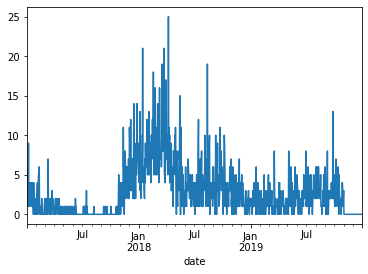

In [7]:
# Specify product_id
product_id = 'P0001'

# Slice time series by product_id
display(ts_global_sales_by_product.loc[:, product_id])

# plot the time series
ts_global_sales_by_product.loc[:, product_id].plot()
plt.show()

### Daily revenue per store

In [8]:
## Daily revenue by store_id
ts_revenue_by_store = df_sales.groupby(by=['date', 'store_id'])['revenue'].sum()
display(ts_revenue_by_store)

date        store_id
2017-01-02  S0001       187.86
            S0002       171.59
            S0003        67.47
            S0004        61.40
            S0006        10.56
                         ...  
2019-12-29  S0129         0.00
            S0109         0.00
            S0007         0.00
            S0057         0.00
            S0047         0.00
Name: revenue, Length: 157248, dtype: float64

date
2017-01-02    171.59
2017-01-03    178.10
2017-01-04    303.89
2017-01-05    274.65
2017-01-06    193.81
               ...  
2019-12-25      0.00
2019-12-26      0.00
2019-12-27      0.00
2019-12-28      0.00
2019-12-29      0.00
Name: revenue, Length: 1092, dtype: float64

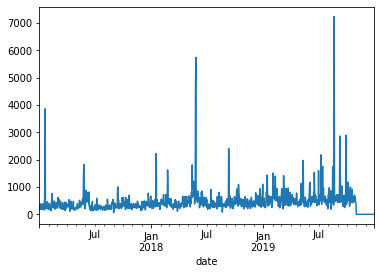

In [9]:
# Specify product_id
store_id = 'S0002'

# Slice time series by product_id
display(ts_revenue_by_store.loc [:, store_id])

# plot the time series̈
ts_revenue_by_store.loc[:, store_id].plot()
plt.show()

## Resampling Timeseries
Our dataset has daily ovservations. What if we want weekly, or monthly aggregates? How do we fill missing dates in our time series?

If your timeseries has a `pd.DateTimeIndex` we can use `pd.Grouper` or `pd.resample()`to fill gaps, or aggregate to other frequencies.
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html
- http://benalexkeen.com/resampling-time-series-data-with-pandas/
- https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects
- https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html
- https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#grouping-with-a-grouper-specification
- https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling

In [10]:
# Transfrom it to monthly obersvations per store
ts_revenue_by_store_monthly = ts_revenue_by_store.groupby([pd.Grouper(level='store_id'), 
                                                           pd.Grouper(freq='1M', level='date')]).sum()
ts_revenue_by_store_monthly

store_id  date      
S0001     2017-01-31    13496.48
          2017-02-28     7418.76
          2017-03-31     9549.25
          2017-04-30    11358.55
          2017-05-31    13353.86
                          ...   
S0047     2019-08-31     6275.34
          2019-09-30     3438.22
          2019-10-31     2246.88
          2019-11-30        0.00
          2019-12-31        0.00
Name: revenue, Length: 5184, dtype: float64

In [11]:
# Resample works only on DataFrames with a single index
# For example lets calculate a weekly mean
ts_revenue_by_store.loc[:, store_id].resample('1W').mean()

date
2017-01-08     259.034286
2017-01-15     270.987143
2017-01-22    1057.737143
2017-01-29     296.912857
2017-02-05     249.352857
                 ...     
2019-12-01       0.000000
2019-12-08       0.000000
2019-12-15       0.000000
2019-12-22       0.000000
2019-12-29       0.000000
Freq: W-SUN, Name: revenue, Length: 156, dtype: float64

## Missing values
`resample()` can also be used to fill missing gaps.
- https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data

In [12]:
# resample can also be used to fill missing gaps forwardfilling 
ts_revenue_by_store.loc[:, store_id].resample('1D').ffill()

date
2017-01-02    171.59
2017-01-03    178.10
2017-01-04    303.89
2017-01-05    274.65
2017-01-06    193.81
               ...  
2019-12-25      0.00
2019-12-26      0.00
2019-12-27      0.00
2019-12-28      0.00
2019-12-29      0.00
Freq: D, Name: revenue, Length: 1092, dtype: float64